In [104]:
# importing ncessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# import outlier_influence library to find variance inflation factor(vif)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing sklearn library for using in train test and feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# loading the dataset
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')
df.shape

(8760, 14)

In [3]:
# checking the rows and columns
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
# checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# cheking numerical information i.e describing the data
df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [6]:
# Checking null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [7]:
# converting data types of some columns
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# breakdown the date into day, month and year
df['Weekday'] = df['Date'].dt.day_name()
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# removing the day column from dataframe
df.drop('Date', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekday                    8760 non-null   objec

In [9]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day Weekday  \
0           0.0            0.0  Winter  No Holiday             Yes  Friday   
1           0.0            0.0  Winter  No Holiday             Yes  Friday   
2           0.0            0.0  Winter  No Holiday             Yes  Friday   
3           0.0            0.0  Winter  No Holiday             Yes  Friday   
4           0.0            0.0  Winter  No Holiday             Yes  Friday   

   Day  Month  Year  
0    1     12  2017  
1    1     12  2017  
2    1     12  2017  
3    1     12  2017  
4    1     12  2017

# Exploratory Data Analysis (EDA)

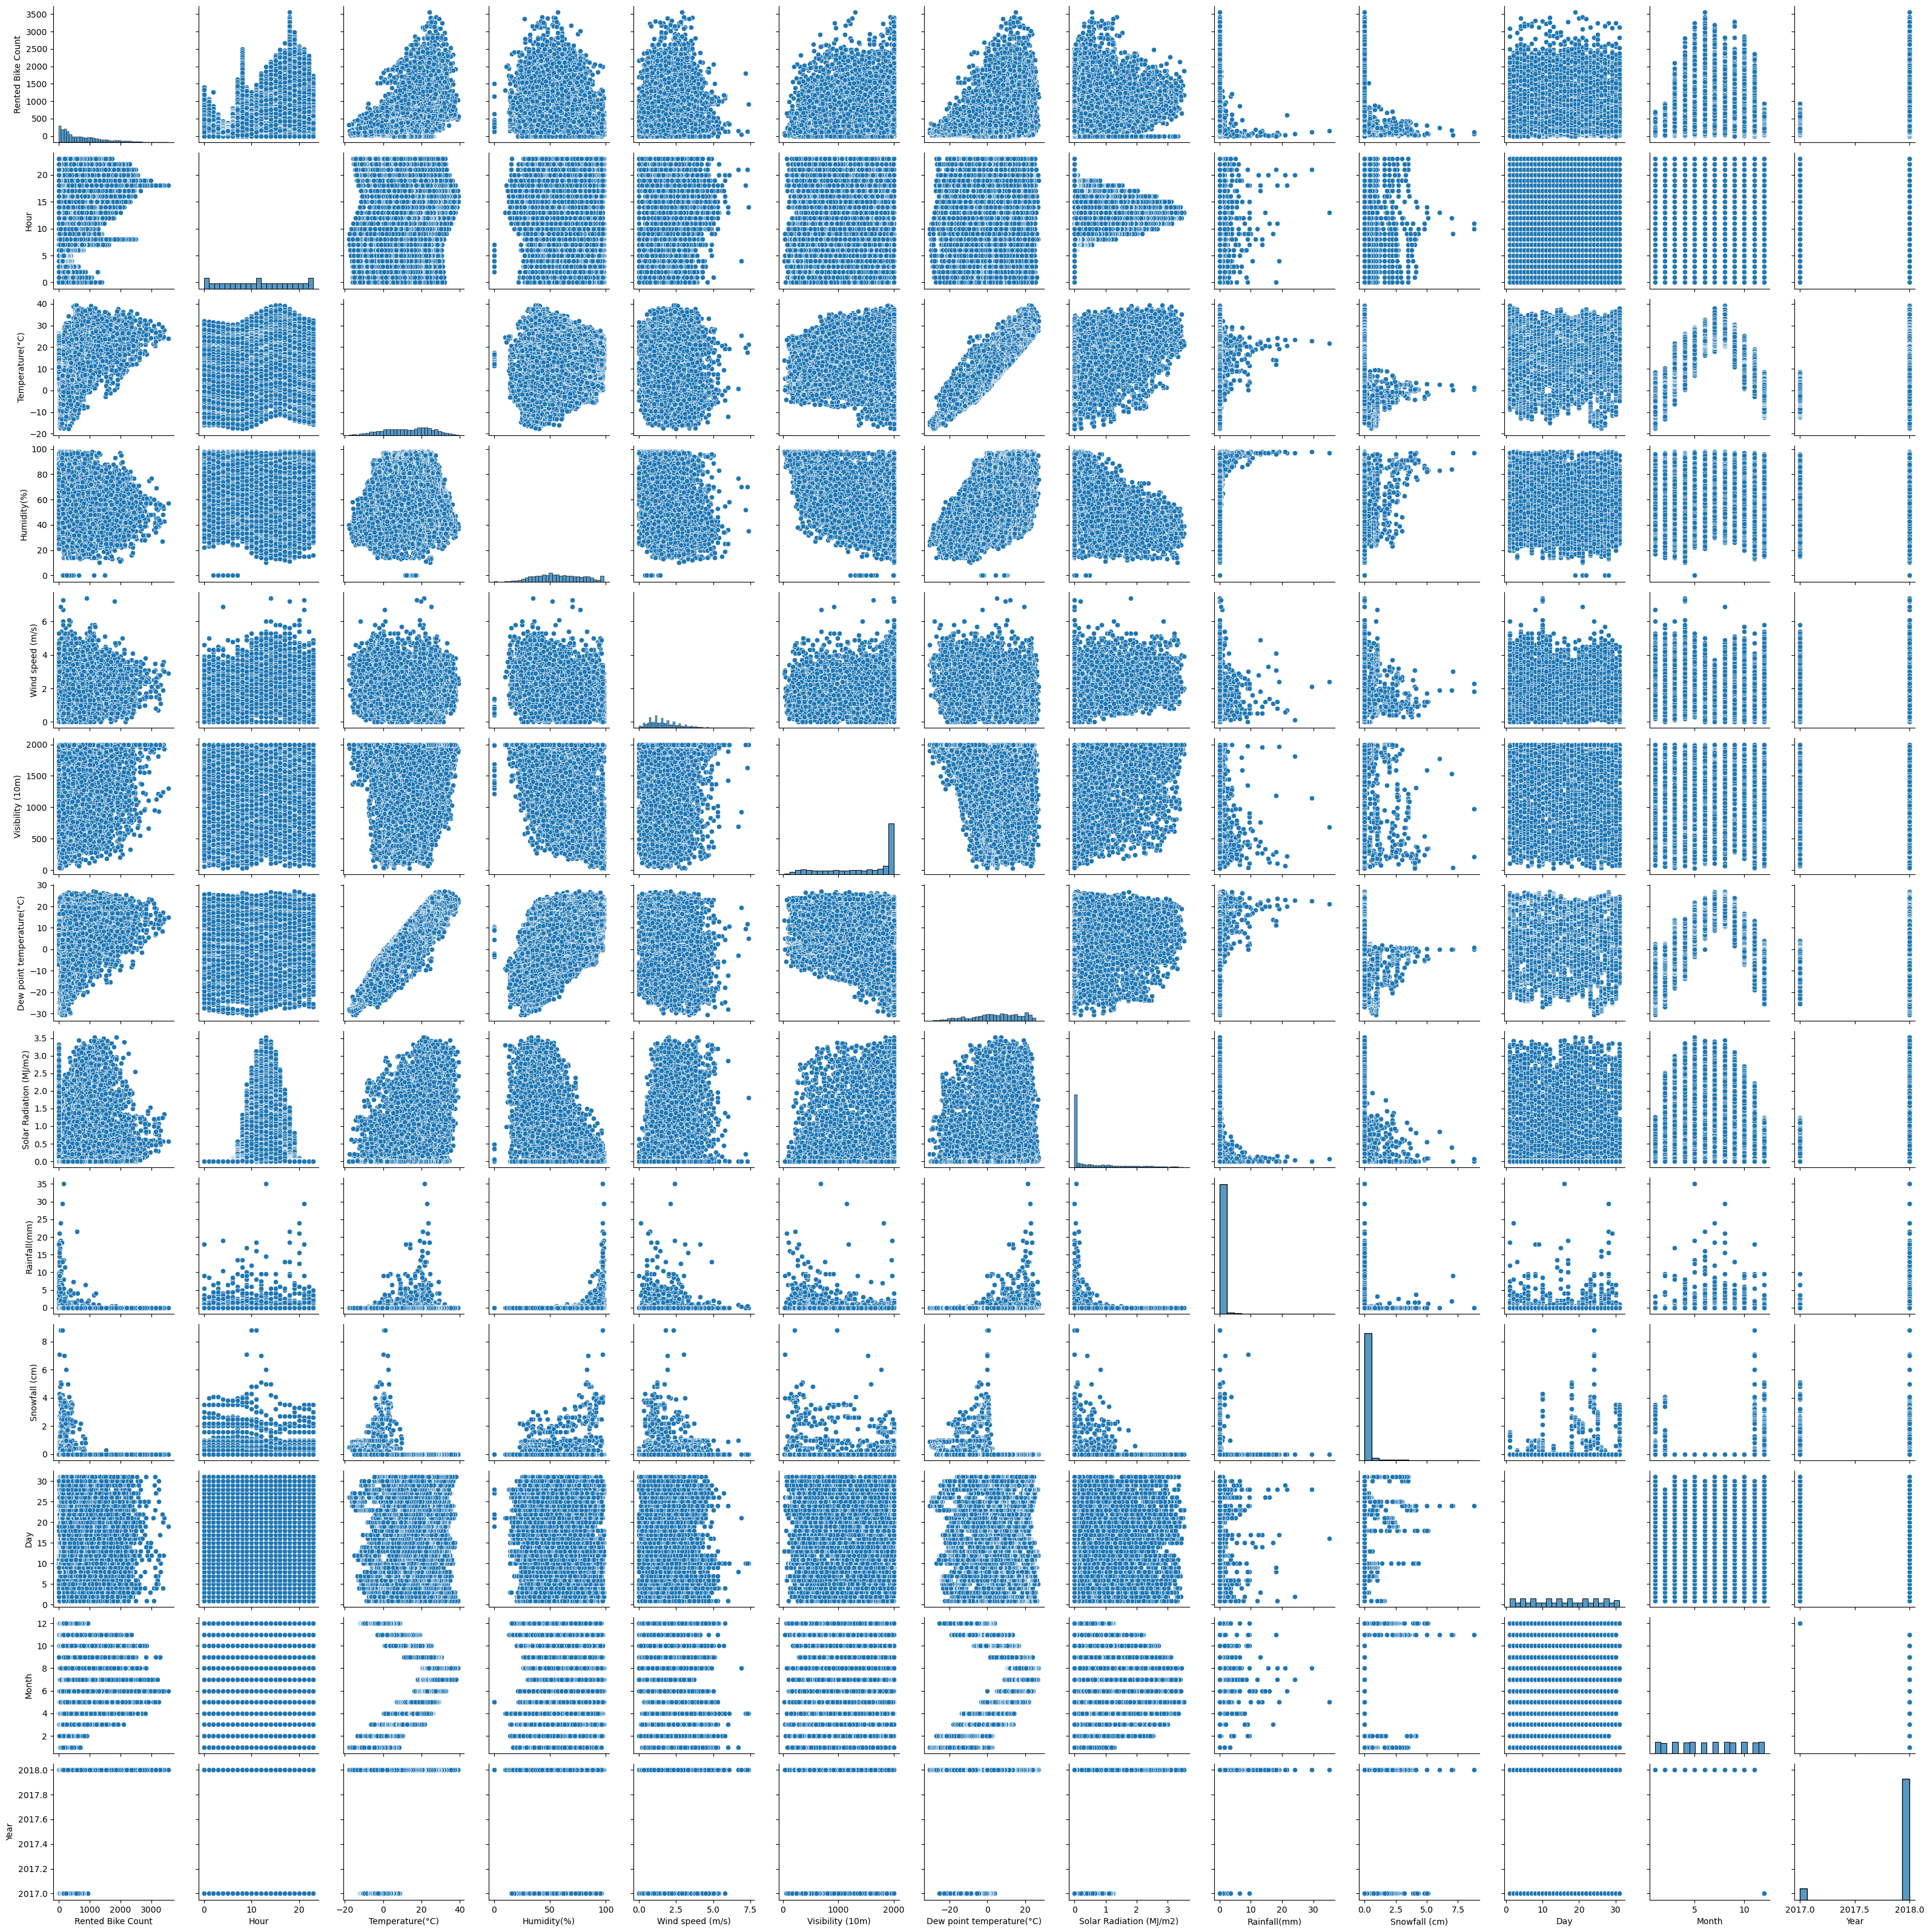

In [10]:
# plots every numerical column wrt each columns
sns.pairplot(df)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

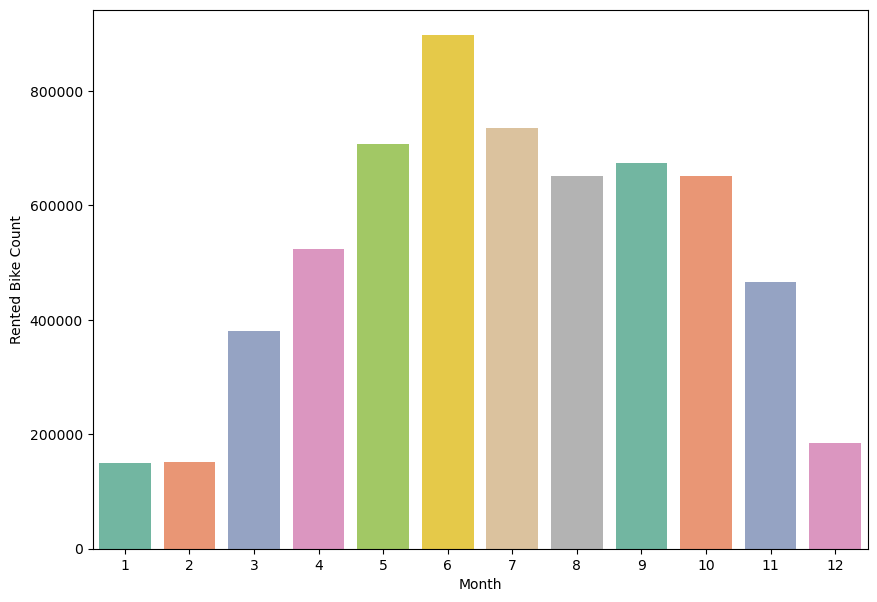

In [16]:
# visualize total bikes rented in each month using barplot
plt.figure(figsize=(10,7))
Month = df.groupby('Month').sum().reset_index()
sns.barplot(x='Month', y='Rented Bike Count', data=Month, palette='Set2')

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

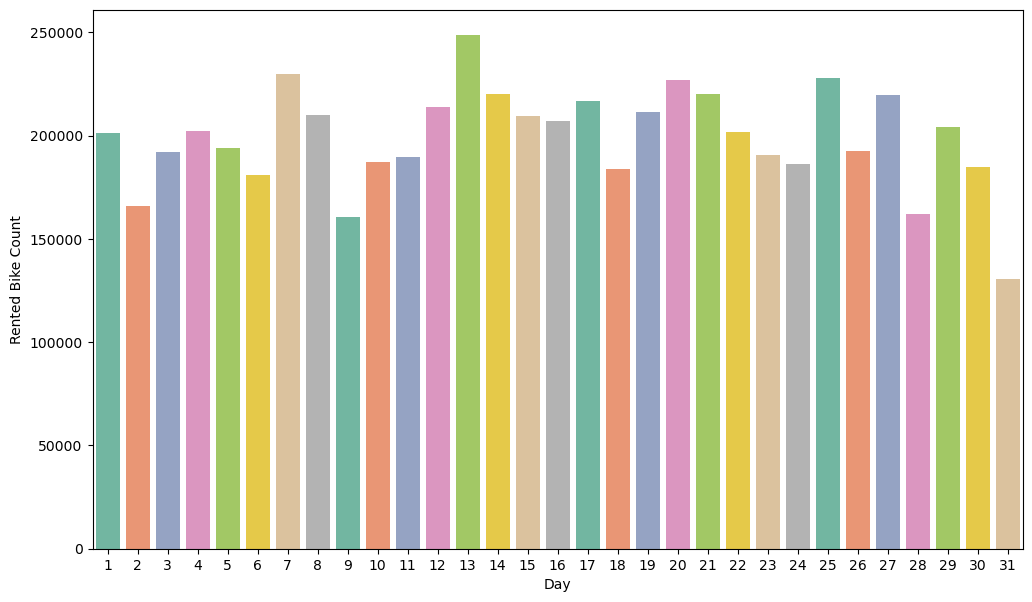

In [18]:
# visualize total bikes rented in each Day using barplot
plt.figure(figsize=(12,7))
Day = df.groupby('Day').sum().reset_index()
sns.barplot(x='Day', y='Rented Bike Count', data=Day, palette='Set2')

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

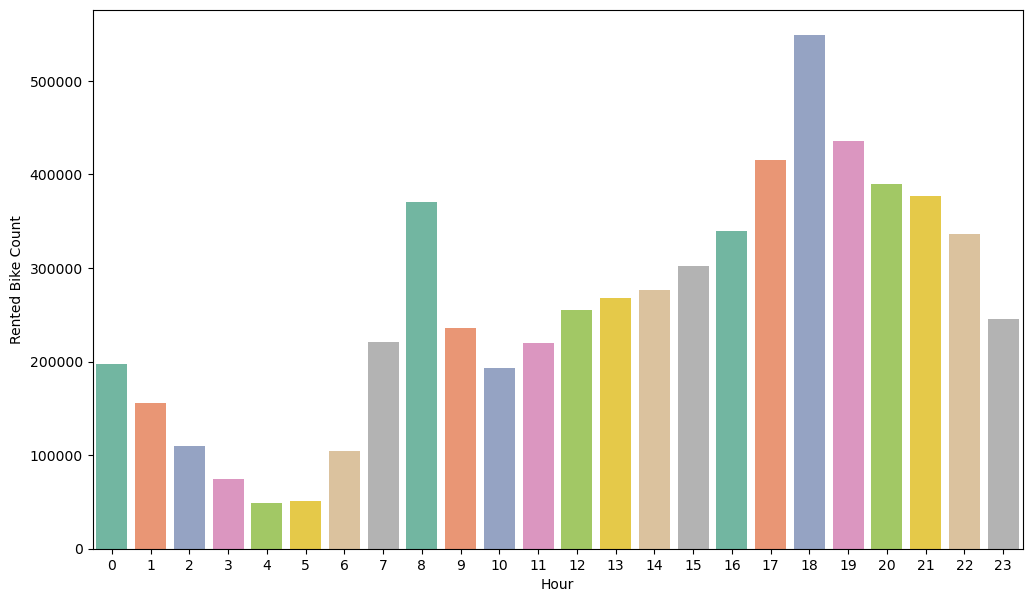

In [25]:
# visualize total bikes rented in each Hour using barplot
plt.figure(figsize=(12,7))
Hour = df.groupby('Hour').sum().reset_index()
sns.barplot(x='Hour', y='Rented Bike Count', data=Hour, palette='Set2')

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

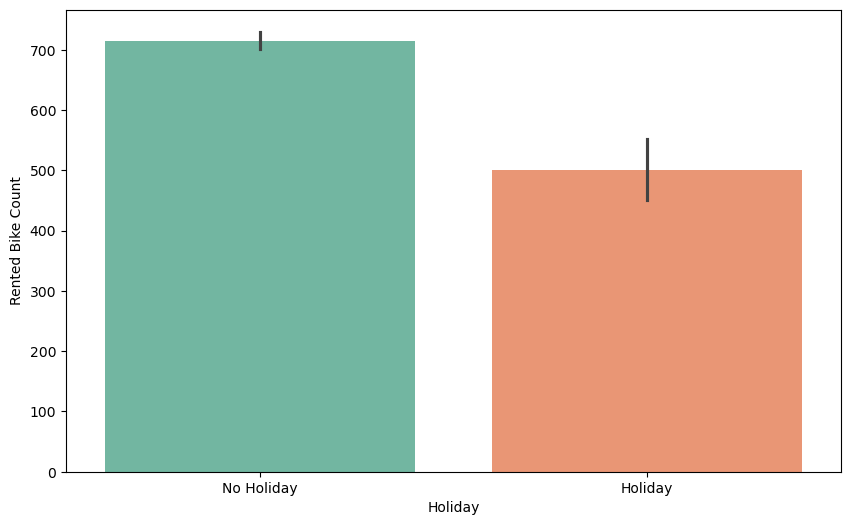

In [27]:
# visualize total bikes rented during holidays/no holidays using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=df, palette='Set2')

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

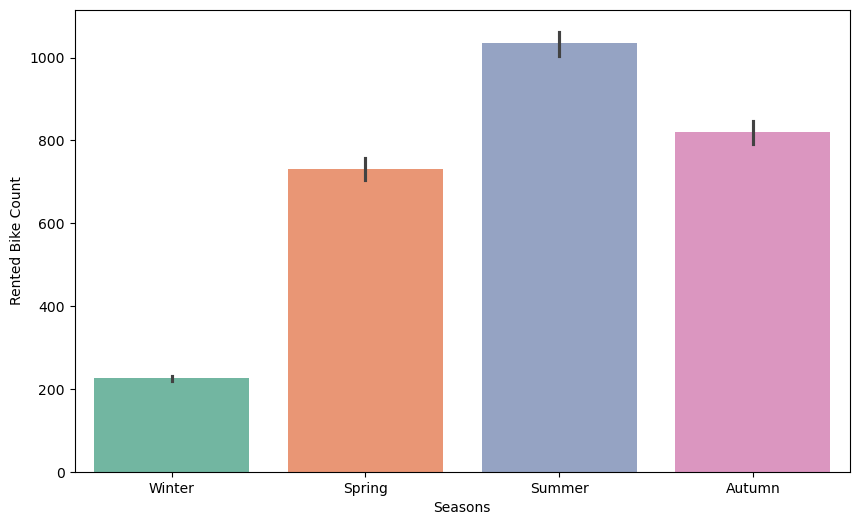

In [28]:
# visualize total bikes rented during different seasons using barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=df, palette='Set2')

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

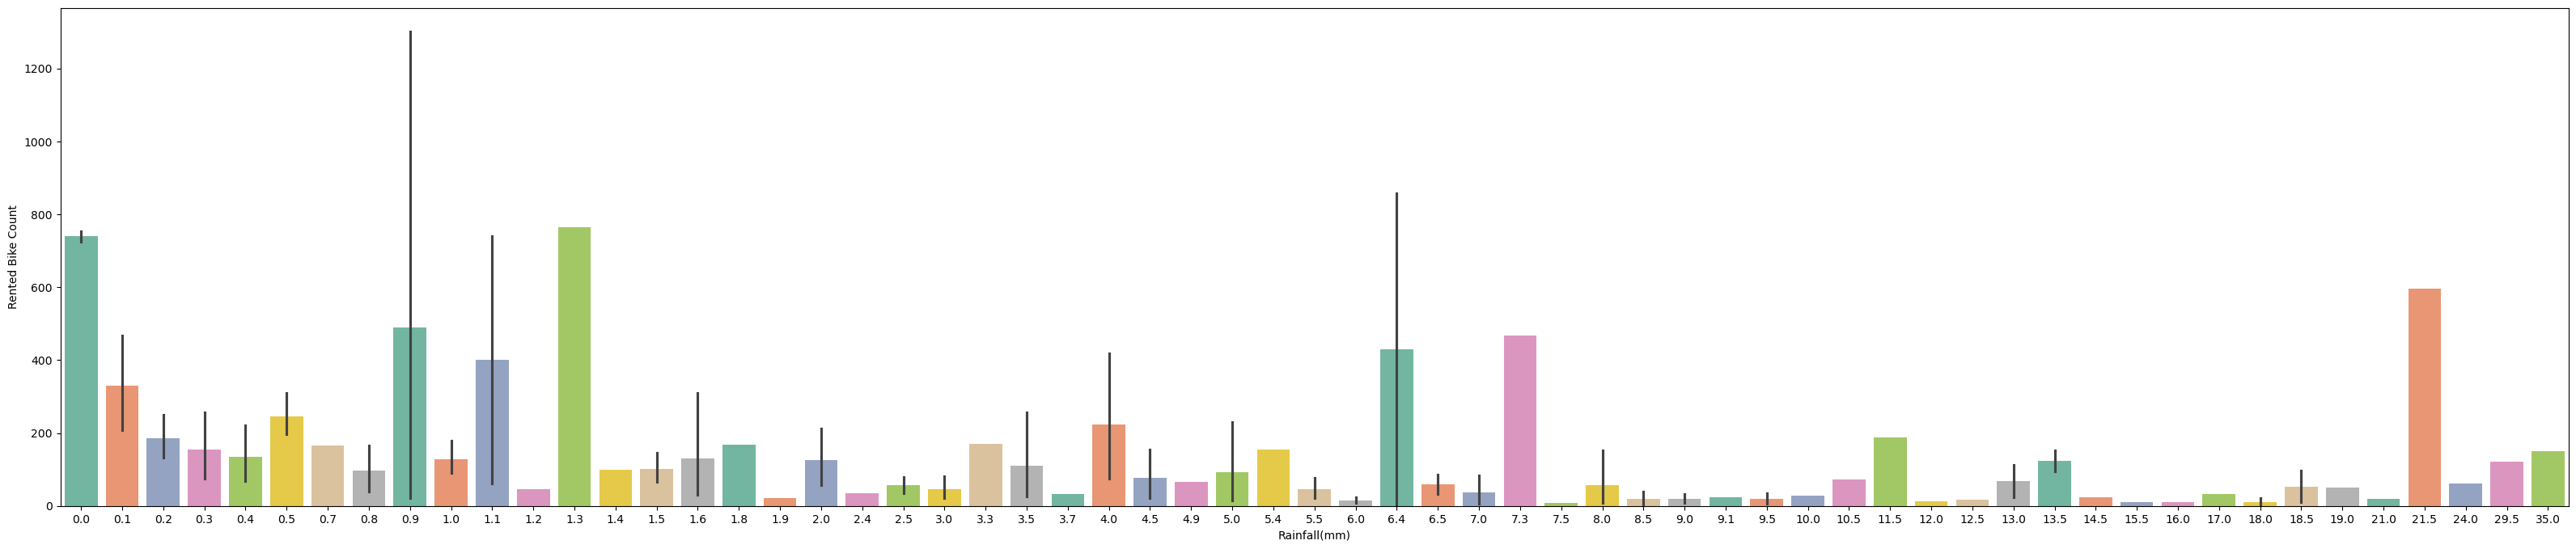

In [34]:
# visualize total bikes rented during rainfalls using barplot
plt.figure(figsize=(40,8))
sns.barplot(x='Rainfall(mm)', y='Rented Bike Count', data=df, palette='Set2')

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

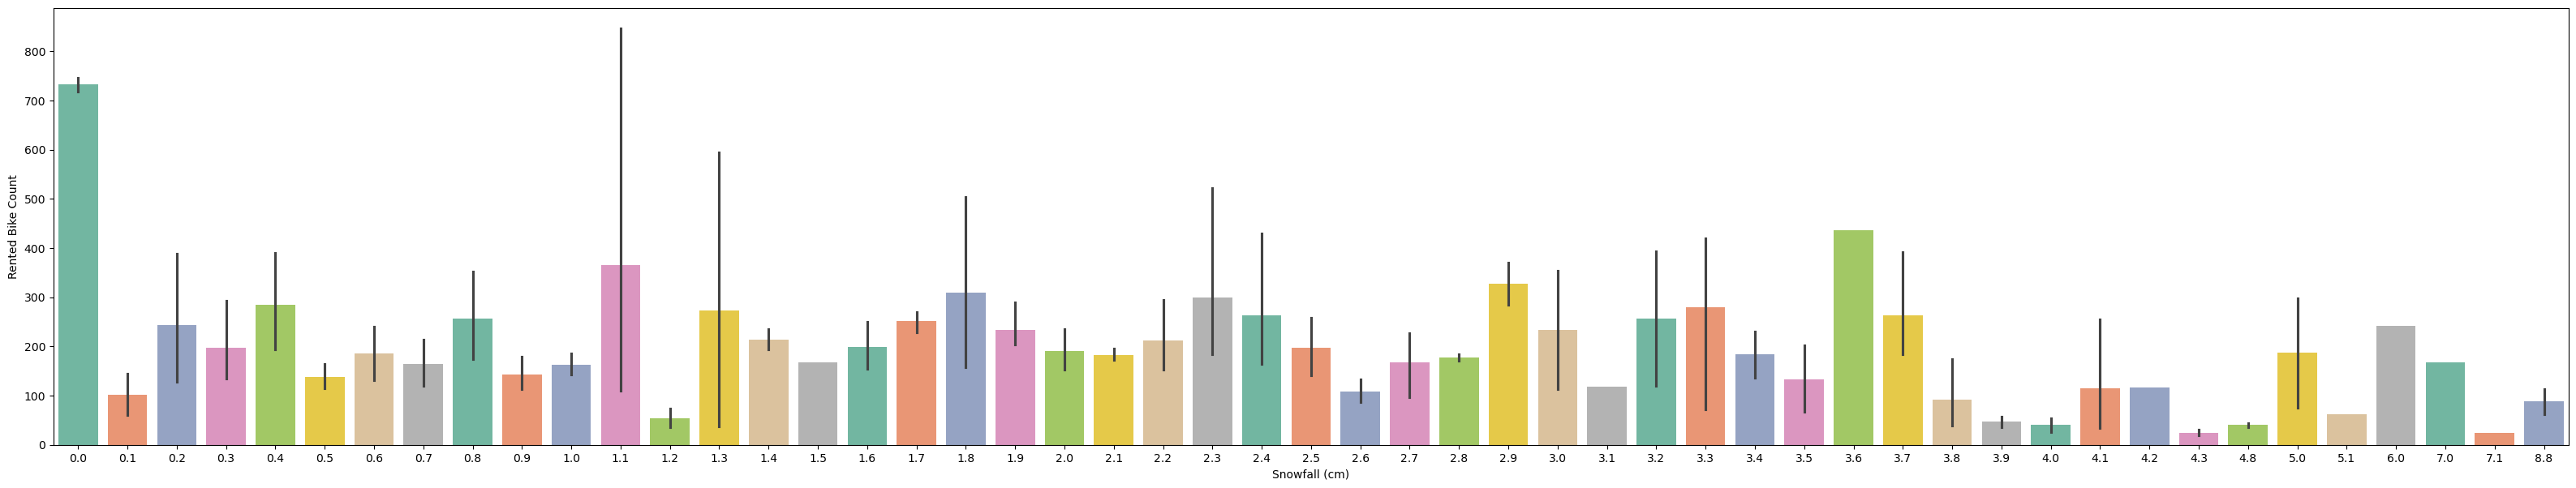

In [36]:
# visualize total bikes rented during snowfall using barplot
plt.figure(figsize=(40,7))
sns.barplot(x='Snowfall (cm)', y='Rented Bike Count', data=df, palette='Set2')

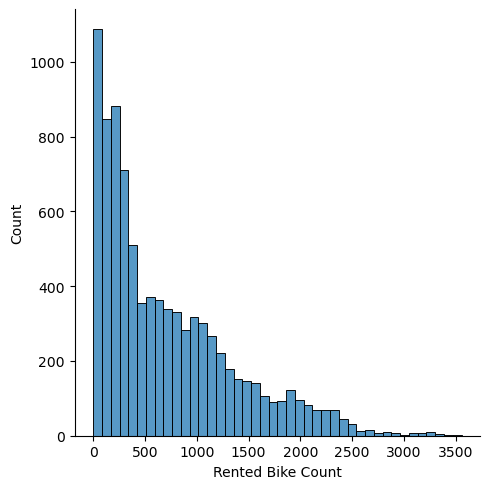

In [38]:
# Visualization distribution plot
sns.displot(df['Rented Bike Count'])

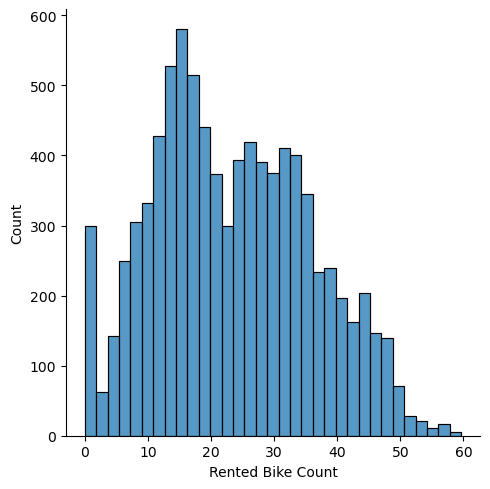

In [39]:
# Visualize Normally Distribution plot
sns.displot(np.sqrt(df['Rented Bike Count']))

In [44]:
# Check skewed data
df.skew(numeric_only=True).sort_values(ascending=True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

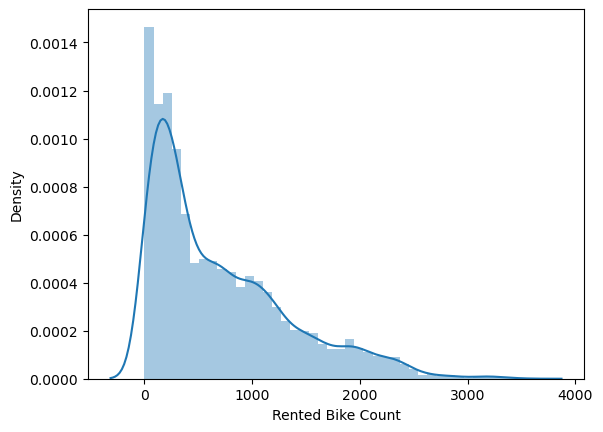

In [45]:
# using distribution plot to visualize skewness
sns.distplot(df['Rented Bike Count'])

## Removing Multicollinearity

In [49]:
# checking correlation
corr = df.corr(numeric_only=True)
corr

Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
Day                                 0.022291  1.434815e-16         0.015645   
Month                               0.133514  1.749414e-15         0.216183   
Year                                0.215162  2.339658e-14         0.377796   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   
Day                          -0.029044         -0.031977         -0.101759   
Month                         0.139875         -0.156710          0.064874   
Year                          0.035925         -0.003781          0.052381   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   
Day                                         0.000153                -0.002982   
Month                                       0.242552                -0.031595   
Year                                        0.336350                 0.128086   

                           Rainfall(mm)  Snowfall (cm)           Day  \
Rented Bike Count             -0.123074      -0.141804  2.229091e-02   
Hour                           0.008715      -0.021516  1.434815e-16   
Temperature(°C)                0.050282      -0.218405  1.564544e-02   
Humidity(%)                    0.236397       0.108183 -2.904392e-02   
Wind speed (m/s)              -0.019674      -0.003554 -3.197744e-02   
Visibility (10m)              -0.167629      -0.121695 -1.017585e-01   
Dew point temperature(°C)      0.125597      -0.150887  1.525311e-04   
Solar Radiation (MJ/m2)       -0.074290      -0.072301 -2.981839e-03   
Rainfall(mm)                   1.000000     

<Axes: >

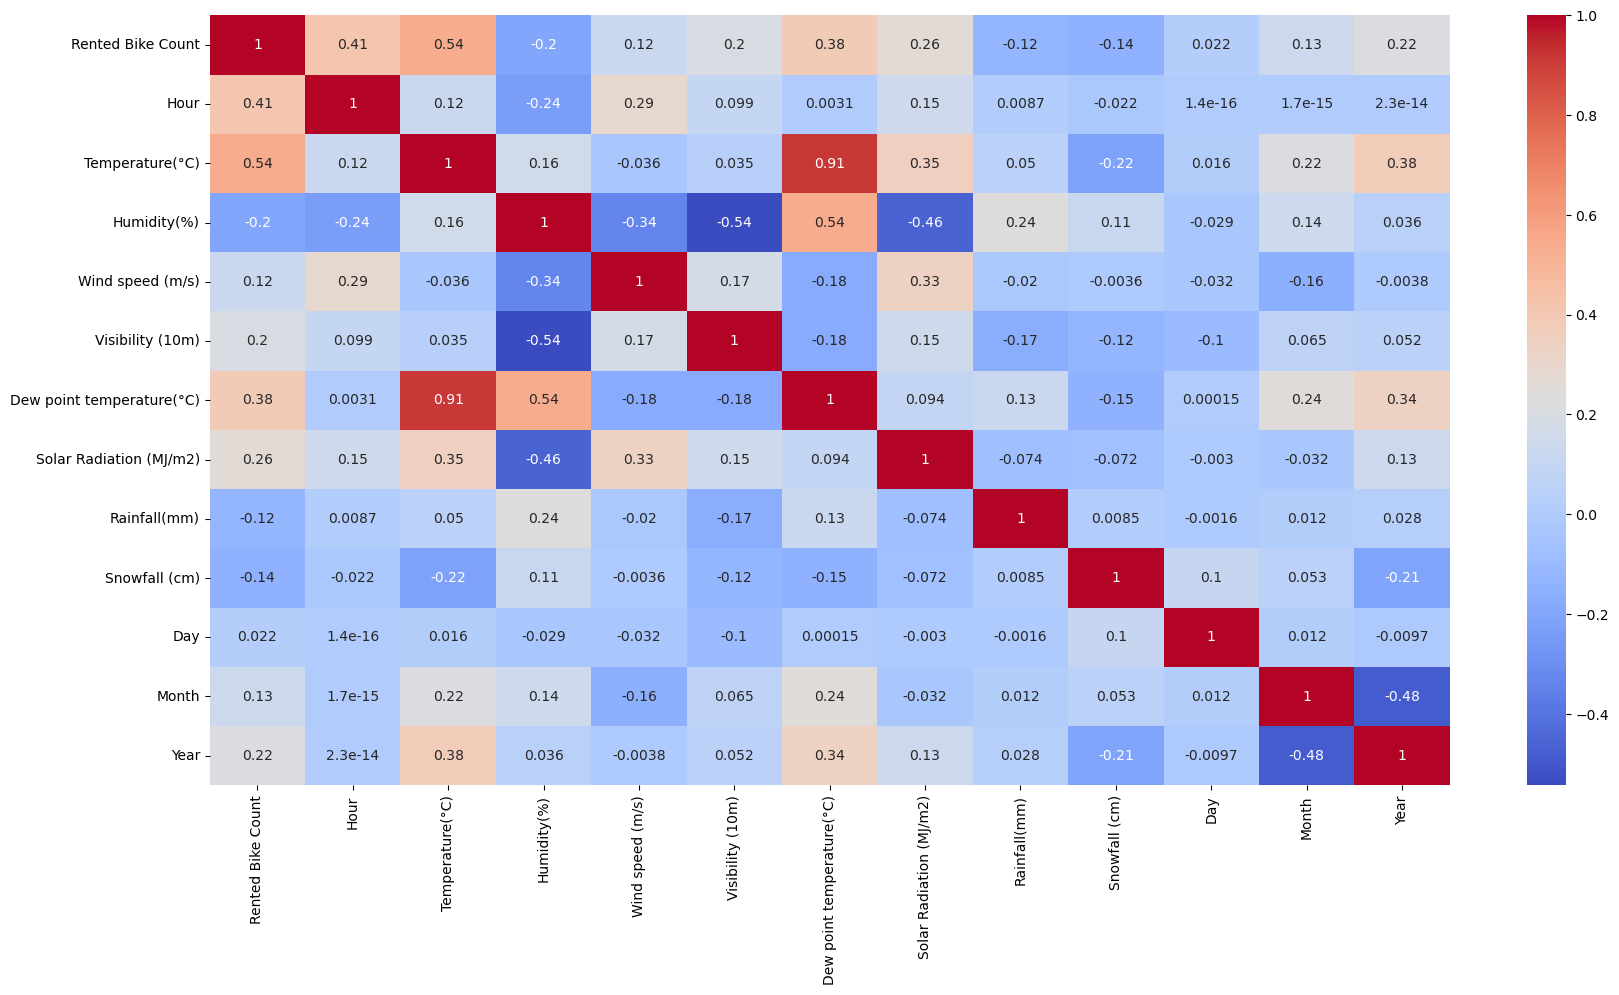

In [68]:
# plotting correlation
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [75]:
# make function for calculating vif
def get_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    
    return vif

In [78]:
# getting vif only for certain columns
not_for_vif = ['Day','Month','Year','Rented Bike Count']

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables        VIF
0                       Hour   4.418242
1            Temperature(°C)  33.385256
2                Humidity(%)   5.371996
3           Wind speed (m/s)   4.805364
4           Visibility (10m)   9.085977
5  Dew point temperature(°C)  17.126199
6    Solar Radiation (MJ/m2)   2.881590
7               Rainfall(mm)   1.081567
8              Snowfall (cm)   1.120833

In [80]:
# getting vif if Dew Point Temperature is removed
not_for_vif = ['Day','Month','Year','Rented Bike Count','Dew point temperature(°C)']

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

- After removing dew point temp we can observe that vif for other columns are normal hence we can remove the dew point column

In [81]:
# dropping dew point temp column
df.drop(['Dew point temperature(°C)'], axis=1, inplace=True)

## Encoding - Categorical to Numerical

In [83]:
# checking object data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [84]:
# listing all categorical data
cat_features = ['Seasons','Holiday','Functioning Day','Weekday']

In [85]:
# total distinct values in Holiday
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [86]:
# total distinct values in Functioning Day
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [87]:
# total distinct values in Weekday
df['Weekday'].value_counts()

Weekday
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

In [88]:
# total distinct values in Seasons
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [89]:
# changing categorical values into numerical values
df['Holiday'] = df['Holiday'].map({'No Holiday':0, 'Holiday':1})
df['Functioning Day'] = df['Functioning Day'].map({'No':0, 'Yes':1})

In [90]:
# we will use one hot encoding for seasons and weekdays
df_season = pd.get_dummies(df['Seasons'], drop_first=True)
df_weekday = pd.get_dummies(df['Weekday'], drop_first=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [92]:
# concatenating the original dataframe with seasons & weekday dataframe
df = pd.concat([df,df_season,df_weekday], axis=1)

In [94]:
# converted the bool values into 0/1
df = df.replace({True: 1, False: 0})

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [96]:
# now we can drop seasons and weekdays column
df.drop(['Seasons','Weekday'], axis=1, inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int32  
 12  Month                    8760 non-null   int32  
 13  Year                     8760 non-null   int32  
 14  Spring                  

In [98]:
# check the dataset
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  ...  Year  Spring  Summer  Winter  Monday  Saturday  Sunday  \
0        0  ...  2017       0       0       1       0         0       0   
1        0  ...  2017       0       0       1       0         0       0   
2        0  ...  2017       0       0       1       0         0       0   
3        0  ...  2017       0       0       1       0         0       0   
4        0  ...  2017       0       0       1       0         0       0   

   Thursday  Tuesday  Wednesday  
0         0        0          0  
1         0        0          0  
2         0        0          0  
3         0        0          0  
4         0        0          0  

[5 rows x 23 columns]

In [99]:
# total features or columns & rows
df.shape

(8760, 23)

## Split Data for Training & Testing

In [103]:
# Splitting data into train and test
X = df.drop('Rented Bike Count', axis = 1)
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_train :', y_test.shape)

Shape of X_train : (7008, 22)
Shape of y_train : (7008,)
Shape of X_test : (1752, 22)
Shape of y_train : (1752,)


## Feature Scaling

In [105]:
# performing standard scaler to convert all data into simple range/scale
# StandardScaler standardize the data into standard form
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [106]:
X_train[:]

array([[ 1.51118219,  0.05556521, -2.10940521, ...,  2.46842407,
        -0.40081071, -0.41367015],
       [ 0.93371229,  1.00382241, -0.25185689, ..., -0.40511677,
         2.49494334, -0.41367015],
       [-0.65432992, -0.32706489,  0.43250302, ..., -0.40511677,
        -0.40081071, -0.41367015],
       ...,
       [-0.65432992, -0.6764228 ,  1.16574577, ..., -0.40511677,
        -0.40081071, -0.41367015],
       [ 0.78934482,  1.83562697, -0.34962259, ..., -0.40511677,
         2.49494334, -0.41367015],
       [-0.65432992,  0.77091713,  0.77468297, ..., -0.40511677,
        -0.40081071, -0.41367015]])

In [112]:
# we can now perform different operations on Standard Scaler
print(sc.mean_)
print(" ")
print(sc.scale_)

[1.15323916e+01 1.28319920e+01 5.81522546e+01 1.71738014e+00
 1.44041795e+03 5.67796804e-01 1.52539954e-01 7.52283105e-02
 4.92294521e-02 9.67751142e-01 1.56847888e+01 6.50742009e+00
 2.01791510e+03 2.48002283e-01 2.52711187e-01 2.50856164e-01
 1.41695205e-01 1.43407534e-01 1.42408676e-01 1.40981735e-01
 1.38413242e-01 1.46118721e-01]
 
[6.92676802e+00 1.20220548e+01 2.04570722e+01 1.03437653e+00
 6.06508248e+02 8.64469525e-01 1.18093896e+00 4.29006703e-01
 2.16346743e-01 1.76660323e-01 8.78039972e+00 3.45419336e+00
 2.78737249e-01 4.31853159e-01 4.34566730e-01 4.33505881e-01
 3.48737257e-01 3.50487965e-01 3.49468804e-01 3.48002709e-01
 3.45333196e-01 3.53225198e-01]


# Model Selection - Training ML Model

## Linear Regression Model

In [113]:
# importing Linear Regression from sklearn library
from sklearn.linear_model import LinearRegression

In [117]:
# train the linear regression model by fitting the data
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [118]:
# predict the data and see the result
y_pred = lr.predict(X_test)
y_pred

array([  -3.42150244, 1022.33291293, 1474.26387368, ..., 1524.82148315,
        547.90926416,  739.64325466])

## Model Evaluation

In [119]:
# importing metrics library for checking errors
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [120]:
# measuring errors
# Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)

# Root Mean Squared Error
RMSE = np.sqrt(MSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred)

# R Squared Error
R2 = r2_score(y_test,y_pred)

# print the values
print(f'MSE : {MSE}')
print(f'RMSE : {RMSE}')
print(f'MAE : {MAE}')
print(f'R2: {R2}')

MSE : 186569.98193192578
RMSE : 431.9374745630735
MAE : 330.2107835524914
R2: 0.5429221393038915


In [123]:
# make the functin for multiple model evaluation
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)

    print(f"{model_name} : ['MSE': {round(MSE,3)}, 'RMSE': {round(RMSE,3)}, 'MAE': {round(MAE,3)}, 'R2': {round(R2,3)}]")

In [124]:
get_metrics(y_test, y_pred, 'LinearRegression')

LinearRegression : ['MSE': 186569.982, 'RMSE': 431.937, 'MAE': 330.211, 'R2': 0.543]


## Train multiple models

In [126]:
# importing multiple libraries 
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [127]:
# training Ridge model
rir = Ridge().fit(X_train,y_train)
y_pred_rir = rir.predict(X_test)

# training Lasso model
lar = Lasso().fit(X_train,y_train)
y_pred_lar = lar.predict(X_test)

# training Polynomial model
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_r = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_r.predict(X_test_poly)

# training Support Vector regressor
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# training K-Neighnor regressor
knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

# training Decision Tree regressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

# training Random Forest regressor
rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# training XGBoost regressor
xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [129]:
# Evaluate each metrics for trained models
get_metrics(y_test, y_pred_rir, 'Ridge')
get_metrics(y_test, y_pred_lar, 'Lasso')
get_metrics(y_test, y_pred_poly, 'PolynomialFeatures')
get_metrics(y_test, y_pred_svr, 'SVR')
get_metrics(y_test, y_pred_knnr, 'KNeighborsRegressor')
get_metrics(y_test, y_pred_dtr, 'DecisionTreeRegressor')
get_metrics(y_test, y_pred_rfr, 'RandomForestRegressor')
get_metrics(y_test, y_pred_xgbr, 'XGBRegressor')

Ridge : ['MSE': 186567.569, 'RMSE': 431.935, 'MAE': 330.2, 'R2': 0.543]
Lasso : ['MSE': 187028.139, 'RMSE': 432.468, 'MAE': 330.257, 'R2': 0.542]
PolynomialFeatures : ['MSE': 117086.324, 'RMSE': 342.179, 'MAE': 239.633, 'R2': 0.713]
SVR : ['MSE': 313071.334, 'RMSE': 559.528, 'MAE': 381.349, 'R2': 0.233]
KNeighborsRegressor : ['MSE': 100530.621, 'RMSE': 317.066, 'MAE': 207.508, 'R2': 0.754]
DecisionTreeRegressor : ['MSE': 57974.552, 'RMSE': 240.779, 'MAE': 132.834, 'R2': 0.858]
RandomForestRegressor : ['MSE': 29093.752, 'RMSE': 170.569, 'MAE': 97.697, 'R2': 0.929]
XGBRegressor : ['MSE': 24164.912, 'RMSE': 155.451, 'MAE': 95.454, 'R2': 0.941]


- From Above data wae can observe that RandomForestRegressor and XGBRegressor both have high accuracy approximately 93%, so we will use both of them for Fine Tuning

## Visualize Model  Prediction

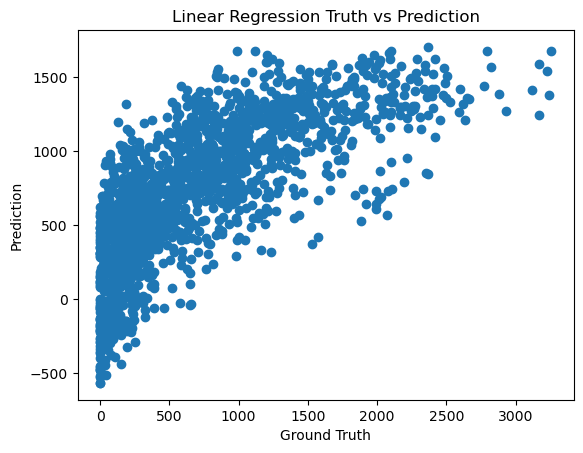

In [131]:
# Linear Regression 
plt.scatter(y_test, y_pred)
plt.title('Linear Regression Truth vs Prediction')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

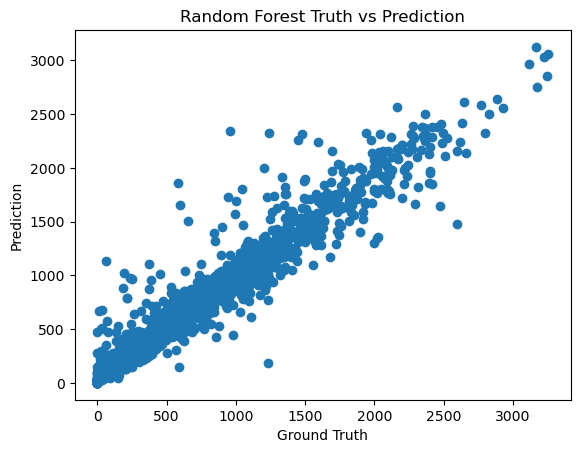

In [133]:
# Random Forest Regression 
plt.scatter(y_test, y_pred_rfr)
plt.title('Random Forest Truth vs Prediction')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

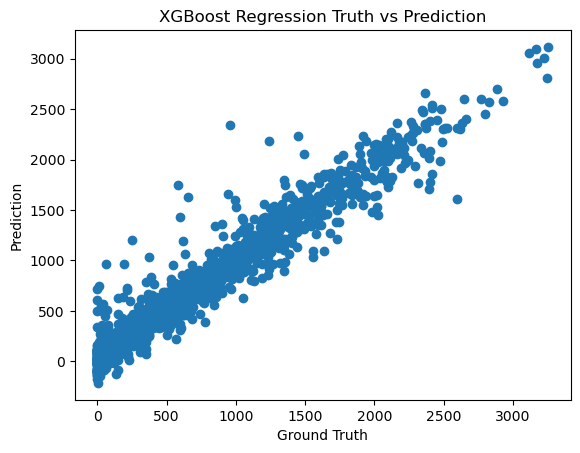

In [134]:
# XGBoost Regression 
plt.scatter(y_test, y_pred_xgbr)
plt.title('XGBoost Regression Truth vs Prediction')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

## Cross Validation and Fine Tuning

### Hyperparameter Tuning for Random Forest Regressor

In [143]:
# import library
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10, 120, num=12)]

# minumum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training each tree
bootstrap = [True, False]

# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [144]:
# import time to record process time
import time
start_time = time.time()


rf = RandomForestRegressor()

# Random search of parameters using 3 fold cross validation
# search across 100 different combinations and use all avialable cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs= -1)

# fit the random search model
rf_random.fit(X_train, y_train)
y_pred_rf_random = rf_random.predict(X_test)

print('Time taken to training randomize search :', time.time()-start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   5.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   5.5s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   5.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   7.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   5.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  12.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimator

In [145]:
# find metrics w.r.t tuned random forest
get_metrics(y_test, y_pred_rf_random, 'RandomForestRegressor Fine Tuning')

RandomForestRegressor Fine Tuning : ['MSE': 33132.654, 'RMSE': 182.024, 'MAE': 114.579, 'R2': 0.919]


In [146]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'bootstrap': False}

In [149]:
# using best parameters to tune the Random Forest Regressor
rf_tuned = RandomForestRegressor(n_estimators=400,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features='sqrt',
                                 max_depth=120,
                                 bootstrap=False)

# fit the model
rf_tuned.fit(X_train,y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

# get the metrics
get_metrics(y_test, y_pred_rf_tuned, 'RandomForestRegressor With Best Parameters')

RandomForestRegressor With Best Parameters : ['MSE': 32373.99, 'RMSE': 179.928, 'MAE': 113.245, 'R2': 0.921]


### Hyperparameter Tuning for XGBoost Regressor

In [151]:
from sklearn.model_selection import RandomizedSearchCV

import time

start_time = time.time()

params = {'max_depth':[3,5,6,10,15,20],
          'learning_rate':[0.01,0.1,0.2,0.3],
          'subsample': np.arange(0.5,1.0,0.1),
          'cosample_bytree': np.arange(0.4,1.0,0.1),
          'cosample_bylevel': np.arange(0.4,1.0,0.1),
          'n_estimators':[100,500,1000]}

xgbr = XGBRegressor(seed=20)
rscv = RandomizedSearchCV(estimator=xgbr,
                          param_distributions=params,
                          scoring='neg_mean_squared_error',
                          n_iter=25,
                          cv=5,
                          verbose=1)

rscv.fit(X_train,y_train)
y_pred_xgb_random = rscv.predict(X_test)

get_metrics(y_test, y_pred_xgb_random, 'XGBRegressor with best parameters')

print('Time taken to training using randomize search :', time.time()-start_time)

print('Best Parameters : ', rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBRegressor with best parameters : ['MSE': 20432.303, 'RMSE': 142.942, 'MAE': 83.086, 'R2': 0.95]
Time taken to training using randomize search : 156.52792501449585
Best Parameters :  {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.1, 'cosample_bytree': 0.4, 'cosample_bylevel': 0.6}


In [152]:
xgbr_tuned = XGBRegressor(subsample=0.7,
                    n_estimators=1000,
                    max_depth=6,
                    learning_rate=0.1,
                    cosample_bytree=0.4,
                    cosample_bylevel=0.6)

xgbr_tuned.fit(X_train,y_train)
y_pred_xgbr_tuned = xgbr_tuned.predict(X_test)

get_metrics(y_test, y_pred_xgbr_tuned, 'XGBRegressor with best parameters')

XGBRegressor with best parameters : ['MSE': 20224.183, 'RMSE': 142.212, 'MAE': 83.495, 'R2': 0.95]


# Save Best ML Model

In [154]:
# import libraries
import pickle
import os

dir = r"/Users/Ankush/Desktop/Data Science/Seoul Bike Sharing Prediction/models"

# give a name to the file
model_file_name = "xgboost_regressor_r2_0_95_v1.pkl"

# set file into path
model_file_path = os.path.join(dir, model_file_name)

# save the file into binary form
pickle.dump(xgbr_tuned, open(model_file_path, 'wb'))